In [17]:
%matplotlib inline
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [18, 8]

The following will read the Application Server data and put in a Pandas dataframe.
Afterwards the data desciption file is opened and printed to the screen. This file is quite basic. A more detailed one can be found here: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names.

In [18]:
Return the month names of the DateTimeIndex with specified locale.app_df = pd.read_csv("../app_server.csv")

In [19]:
f = open('../APP_README', 'r')
file_content = f.read()
print(file_content)
f.close()

DT    = Datetime
VPH   = Vistis per Hour
TPH   = Transactions per Hour
CPU   = CPU_Usage in %
MEM   = MEM_Usage in %
IO    = I/O in %

Number of Instances = 8760
Number of Features  = 6



In [20]:
print(app_df.head(5))

              DT    VPH    TPH   CPU   MEM    IO
0  1/1/2014 0:00  49299  17579  18.1  46.6  12.9
1  1/1/2014 1:00  28372   9092  16.6  37.9  14.1
2  1/1/2014 2:00   6528   2051  11.5  40.1  11.4
3  1/1/2014 3:00   1291    463  13.7  45.6  11.9
4  1/1/2014 4:00   4709   1588  18.8  45.0  15.1


datetime64[ns]


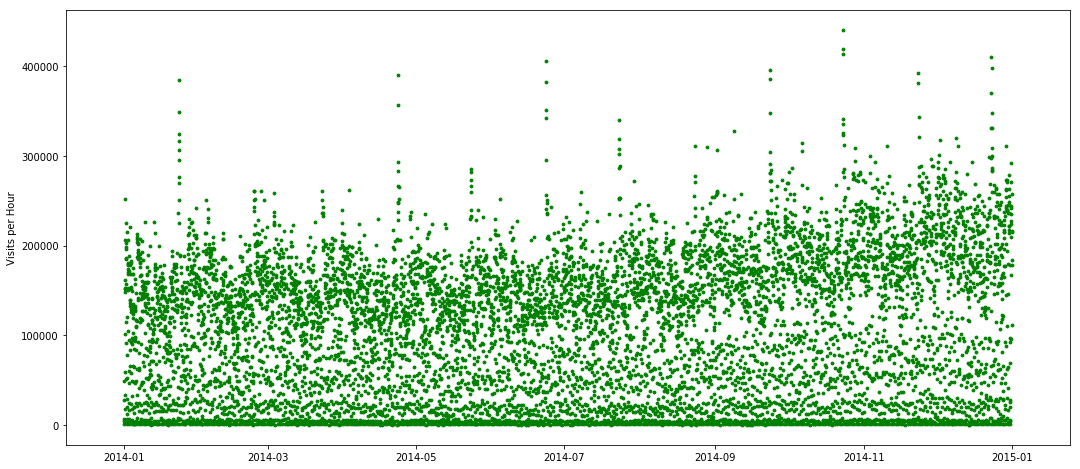

In [21]:
app_df['DT'] = pd.to_datetime(app_df['DT'], format="%m/%d/%Y %H:%M")
datetime = app_df['DT']
datetime = datetime.values.reshape(len(datetime), 1)
print(datetime.dtype)
vph = app_df['VPH']
vph = vph = vph.values.reshape(len(vph), 1)
plt.ylabel('Visits per Hour')
plt.scatter(datetime, vph, s=8, color='g')

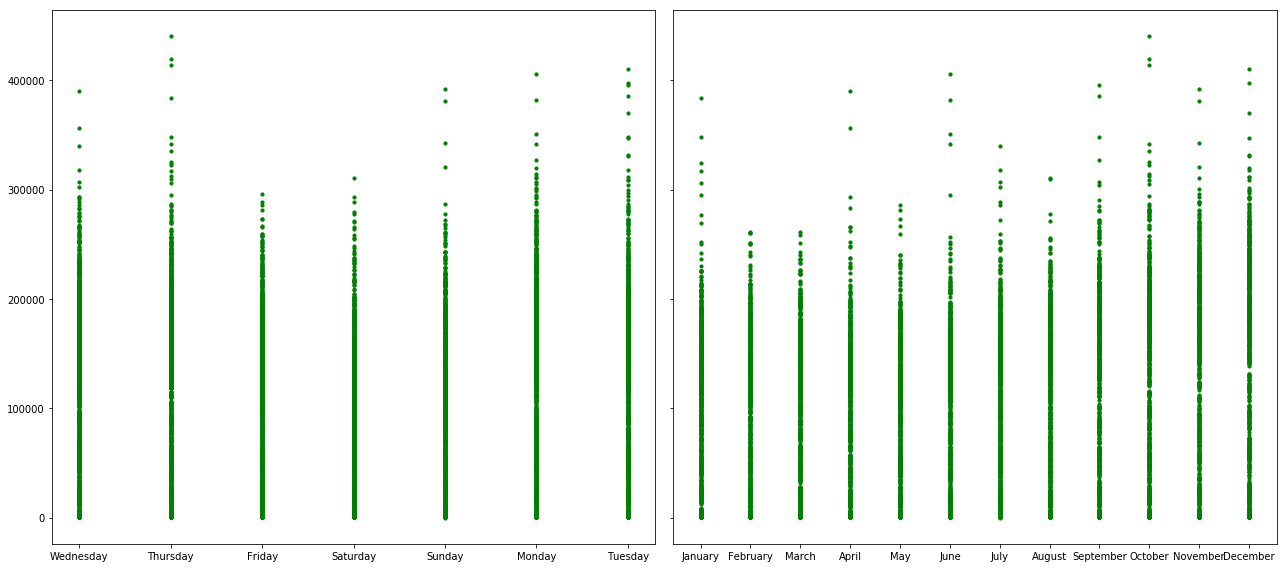

In [62]:
app_df['day_of_week'] = app_df['DT'].dt.day_name()
app_df['month_of_year'] = app_df['DT'].dt.month_name()
day_of_week = app_df['day_of_week']
month_of_year = app_df['month_of_year']
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].scatter(day_of_week, vph, s=10, color='g')
ax[1].scatter(month_of_year, vph, s=10, color='g')
fig.tight_layout()

In [34]:
X_app = app_df['MEM']
X_app = X_app.values.reshape(len(X_app), 1)
Y_app = app_df['VPH']
Y_app = Y_app.values.reshape(len(Y_app), 1)
X_app_train  = X_app[:-4380]
X_app_test = X_app[-4380:]
Y_app_train = Y_app[:-4380]
Y_app_test = Y_app[-4380:]

In [35]:
regr = linear_model.LinearRegression()

In [36]:
regr.fit(X_app_train, Y_app_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

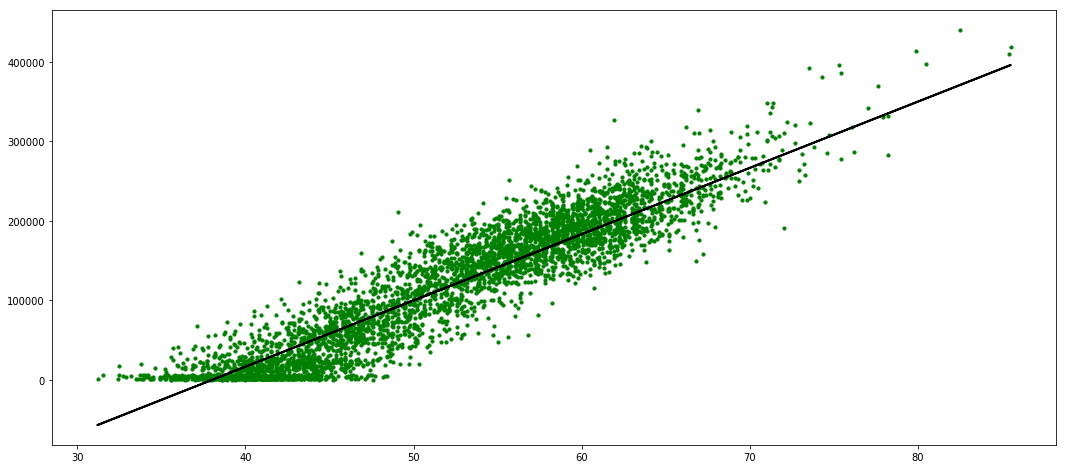

In [37]:
plt.scatter(X_app_test, Y_app_test, color='g', s = 10)
plt.plot(X_app_test, regr.predict(X_app_test), color='black', linewidth=2)

In [38]:
model = sm.OLS(Y_app, X_app).fit()
predictions = model.predict(X_app)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                 3.475e+04
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:21:50   Log-Likelihood:            -1.0882e+05
No. Observations:                8760   AIC:                         2.176e+05
Df Residuals:                    8759   BIC:                         2.177e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2316.9718     12.428    186.424      0.000    2292.609    2341.335
==============================================================================
Omnibus:                      391.606   Durbin-Watson:                   0.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.309
Skew:                           0.227   Prob(JB):                     6.49e-48
Kurtosis:                       2.376   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""